In [4]:
import numpy as np 
import xlrd
import pandas as pd

In [69]:
def read_multisheet_excel(excel_path):
    wb = xlrd.open_workbook(excel_path)
    # 获取workbook中所有的表格
    sheets = wb.sheet_names()
    df_dict = {}
    
    # 读取sheet
    for sheet in sheets:
        df_dict[sheet] = pd.read_excel(excel_path, sheet_name=sheet, skiprows=1, index=None)
    return df_dict

df_dict = read_multisheet_excel("pandas_data/环境质量.xlsx")

df_ = pd.read_excel("pandas_data/产业结构.xlsx")

df_.index = pd.to_datetime(df_.index.astype(str))
df_.index.name = "时间"
df_.columns

Index(['第一产业就业占比', '第二产业就业占比', '第三产业就业占比', '第一产业GDP占比', '第二产业GDP占比',
       '第三产业GDP占比'],
      dtype='object')

In [6]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 移动平均图
def draw_trend(timeSeries, size):
    f = plt.figure(facecolor='white')
    # 对size个数据进行移动平均
    rol_mean = timeSeries.rolling(window=size).mean()
    # 对size个数据进行加权移动平均
    rol_weighted_mean = pd.ewma(timeSeries, span=size)

    timeSeries.plot(color='blue', label='Original')
    rolmean.plot(color='red', label='Rolling Mean')
    rol_weighted_mean.plot(color='black', label='Weighted Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show()

def draw_ts(timeSeries):
    f = plt.figure(facecolor='white')
    timeSeries.plot(color='blue')
    plt.show()

'''
　　Unit Root Test
   The null hypothesis of the Augmented Dickey-Fuller is that there is a unit
   root, with the alternative that there is no unit root. That is to say the
   bigger the p-value the more reason we assert that there is a unit root
'''
def testStationarity(time_series):
    dftest = adfuller(time_series)
    # 对上述函数求得的值进行语义描述
    dfoutput = pd.Series(dftest[0:4], index=['ADF测试值','p值','滞后阶数','所用样本数'])
    for key,value in dftest[4].items():
        dfoutput['拒绝值 (%s)'% key] = value
    return dfoutput

# 自相关和偏相关图，默认阶数为序列长度
def draw_acf_pacf(time_series, lags=None):
    if lags is None:
        lags = len(time_series)
    f = plt.figure(facecolor='white')
    ax1 = f.add_subplot(211)
    plot_acf(time_series, lags=lags, ax=ax1)
    ax2 = f.add_subplot(212)
    plot_pacf(time_series, lags=lags, ax=ax2)
    plt.show()
    
def fillna_with_mean_and_variance(series):
    series = series.copy()
    mean = series.dropna().mean()
    var = series.dropna().var()
    isnan = series.isna()
    fill_list = np.random.normal(mean, var ,size=isnan.sum()+1000)
    fill_idx = 0
    for idx, itm in enumerate(isnan):
        if itm:
            series[series.index[idx]] = fill_list[fill_idx]
            fill_idx += 1
    return series

a = fillna_with_mean_and_variance(df_dict["生态环境指标"]["生态环境状况指数(无锡市区)"])
def diff(series, n):
    return series.copy().diff(n).dropna()
c = diff(df_dict["生态环境指标"]["生态环境状况指数(无锡市区)"], 2)

testStationarity(c.values)

/home/logichacker/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:846: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


ADF测试值      -2.055655
p值           0.262715
滞后阶数         0.000000
所用样本数        8.000000
拒绝值 (1%)    -4.665186
拒绝值 (5%)    -3.367187
拒绝值 (10%)   -2.802961
dtype: float64

In [85]:
df_environment = pd.DataFrame()
for df in df_dict.values():

    for col in df.columns:
        if col != "Unnamed: 0" and col != "时间":
            df_environment = df_environment.append(df[col])
df_environment = df_environment.T
df_environment["时间"] = pd.to_datetime(tmp["日期"].fillna(2017.0).apply(int).apply(str))


df_pleasure = df_environment.loc[:, ('时间', '工业废水排放总量(亿吨)', '生活污水排放总量(亿吨)', '化学需氧量(万吨)', '工业排放烟( 万吨)', '生活污染源排放烟( 万吨)', '工业排放二氧化硫(万吨)', '生活污染源排放二氧化硫(万吨)', '工业固体废物(万吨)', '危险废物(万吨)')].set_index("时间")
df_status = df_environment.loc[:, ('时间', "生态环境状况指数(无锡市区)")].set_index("时间")
df_reaction = df_environment.loc[:, ('时间', '综合利用危险废物(万吨)', '综合利用工业固体废物(万吨)', '一般工业固体废物处置量(万吨)', '危险废物处置量(万吨)')].set_index("时间")

df_value = df_.loc[:, ('第一产业GDP占比', '第二产业GDP占比','第三产业GDP占比')]
df_employ = df_.loc[:, ('第一产业就业占比', '第二产业就业占比', '第三产业就业占比')]

envir = {'环境压力指数':df_pleasure.loc['2006':'2015', :], '环境状态指数':df_status.loc['2006':'2015', :], '环境响应指数':df_reaction.loc['2006':'2015', :]}
product = {'产业产值结构':df_value.loc['2006':'2015', :], '产业就业结构':df_employ.loc['2006':'2015', :]}
for key, value in envir.items():
    value.index = value.index.year
    value.to_excel(f"pandas_data/{key}.xlsx")

for key, value in product.items():
    value.index = value.index.year
    value.to_excel(f"pandas_data/{key}.xlsx")


In [91]:
def scale_dataframe(df):
    tmp = df - df.min()  # equivalent to df = df - df.min()
    tmp /= (df.max() - df.min())  # equivalent to df = df / df.max()
    return tmp * 70 + 30

envir_scaled = {k: scale_dataframe(v) for k, v in envir.items()}
for key, value in envir_scaled.items():
    value.to_excel(f"pandas_data/标准化后/{key}.xlsx")

In [103]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, copy=True, whiten=False)

tmp_dict = {}
for key, value in envir_scaled.items():
#     pca_envir[key] = pca.fit_transform(value)
    tmp = pca.fit_transform(value)
    tmp.shape = (10, )
    tmp_dict[key] = tmp
pca_envir = pd.DataFrame(tmp_dict)
pca_envir.index = envir["环境状态指数"].index
pca_envir.to_excel("pandas_data/标准化后/主成分分析后的数据.xlsx")

for col in pca_envir.columns:
    print(col, '\n' ,testStationarity(pca_envir[col]))

环境压力指数 
 ADF测试值       0.000000
p值           0.958532
滞后阶数         5.000000
所用样本数        4.000000
拒绝值 (1%)    -7.355441
拒绝值 (5%)    -4.474365
拒绝值 (10%)   -3.126933
dtype: float64
环境状态指数 
 ADF测试值       0.176978
p值           0.970940
滞后阶数         3.000000
所用样本数        6.000000
拒绝值 (1%)    -5.354256
拒绝值 (5%)    -3.646238
拒绝值 (10%)   -2.901198
dtype: float64
环境响应指数 
 ADF测试值      -1.571210
p值           0.498038
滞后阶数         1.000000
所用样本数        8.000000
拒绝值 (1%)    -4.665186
拒绝值 (5%)    -3.367187
拒绝值 (10%)   -2.802961
dtype: float64


/home/logichacker/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


In [138]:
w = np.array([1, 2, 3])
w.shape = (3,1)
print(w)
a = product["产业就业结构"].values.dot(w) / 100
a.shape = (10, )
b = product["产业产值结构"].values.dot(w)
b.shape = (10, )

product_obj = {}
product_obj["产业就业结构指数"] = a
product_obj["产业产值结构指数"] = b
product_obj = pd.DataFrame(product_obj, index=product["产业就业结构"].index)
product_obj.index = product["产业就业结构"].index
product_obj.to_excel("pandas_data/产业结构指数.xlsx")

[[1]
 [2]
 [3]]


In [122]:
for col in pca_envir.columns:
    print(col, '\n', testStationarity(pca_envir.diff(1).dropna()[col]))


import statsmodels.api as sm
sm.tsa.stattools.coint(pca_envir.环境压力指数, product["产业就业结构"].values.dot(w))
# 做了校验，都是非单整xul

环境压力指数 
 ADF测试值      -1.213302
p值           0.667847
滞后阶数         2.000000
所用样本数        6.000000
拒绝值 (1%)    -5.354256
拒绝值 (5%)    -3.646238
拒绝值 (10%)   -2.901198
dtype: float64
环境状态指数 
 ADF测试值      -3.128508
p值           0.024514
滞后阶数         0.000000
所用样本数        8.000000
拒绝值 (1%)    -4.665186
拒绝值 (5%)    -3.367187
拒绝值 (10%)   -2.802961
dtype: float64
环境响应指数 
 ADF测试值        0.000000
p值            0.958532
滞后阶数          5.000000
所用样本数         3.000000
拒绝值 (1%)    -10.417191
拒绝值 (5%)     -5.778381
拒绝值 (10%)    -3.391681
dtype: float64


/home/logichacker/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:846: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/home/logichacker/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


(-0.0, 0.98590025802596426, array([-5.52723136, -4.09926457, -3.54927469]))

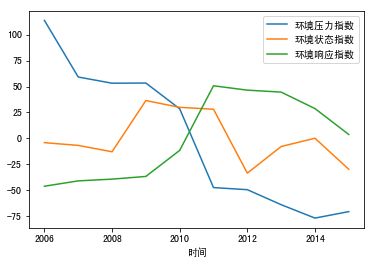

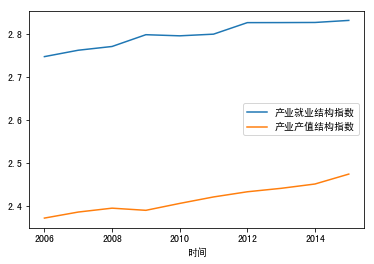

In [141]:
import matplotlib
from matplotlib import rcParams
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['axes.unicode_minus'] = False
pca_envir.plot()
product_obj.plot()


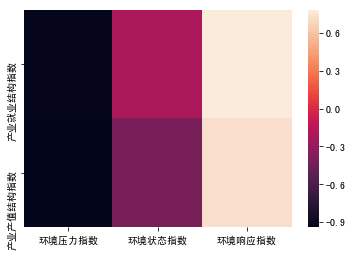

In [145]:
def df_corr(df1, df2):
    df = pd.DataFrame()
    for col in df1.columns:
        for col2 in df2.columns:
            df.at[col, col2] = df1[col].corr(df2[col2])
    return df
df_co = df_corr(product_obj, pca_envir)
import seaborn as sns
sns.heatmap(df_co)